
### Задача 3
В файле experiment.csv сохранены результаты эксперимента, описанного в задаче 
Данные пред- ставляют собой последовательности из 0 и 1, где 1 соответствуют людям, которые захотели выбрать кофе с измененным дизайном этикетки, а 0 - людям, которые не захотели.
Описание данных:
test: результаты по тестовой группе (людям предлагали кофе с новым дизайном этикетки); control: контрольная группа (людям предлагали кофе со старым дизайном этикетки).





1. Загрузите данные из файла experiment.csv, используя Python

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as stm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_experiment = pd.read_csv('experiment.csv', index_col = 0)
df_experiment

,control,test
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
...,...,...
996,0,1
997,1,0
998,0,1
999,1,1


2. Постройте, используя Python, 90%-ный доверительный интервал для доли людей, которые захотели купить кофе,
    в тестовой группе. Проинтерпретируйте полученный доверительный интервал.
    В решении приведите используемый код, границы доверительного интервала и текст с интерпре- тацией.

In [3]:
n = len(df_experiment)
p = sum(df_experiment.test) / n
se = (p * (1 - p) / n) ** 0.5
test_conf_inter = st.norm.interval(alpha = 0.9, loc = p, scale = se)
test_conf_inter

(0.5513028270740822, 0.6026971729259177)

*Полученный результат позволяет нам сделать вывод, что с уверенностью в 90 % доля людей, выбирающих кофе в новой упаковке, среди всех покупателей кофе, находится в интервале от 0.55 до 0.60. Если мы будем проводить подобное исследование, при том же объеме выборки много раз, то в 90% доверительных интервалов будут включать истинное значение доли людей, выбирающих новую упаковку.*

3. Постройте, используя Python, доверительный интервал для доли людей, которые захотели купить кофе, в контрольной группе. Проинтерпретируйте полученный доверительный интервал.
    В решении приведите используемый код, границы доверительного интервала и текст с интерпретацией.

In [4]:
n = len(df_experiment)
p = sum(df_experiment.control) / n
se = (p * (1 - p) / n) ** 0.5
contrl_conf_inter = st.norm.interval(alpha = 0.9, loc = p, scale = se)
contrl_conf_inter

(0.4380600794294326, 0.4899399205705674)

*C уверенностью в 90 % можем сказать, что доля людей, выбирающих кофе в старой упаковке, среди всех покупателей кофе находится в интервале от 0.44 до 0.49. Если мы будем проводить аналогичные исследования независимо друг от друга на многочисленных выборках того же размера, то 90% доверительных интервалов будут включать в себя истинное значение доли желающих купить кофе в старой упаковке*

4. Сравните полученные доверительные интервалы для тестовой и контрольной группы. Можно ли на основании полученных результатов сделать определенный вывод о том, что новый дизайн этикетки лучше (привлекает больше потенциальных покупателей)? Приведите ваши выводы и объяснения.

*Доверительные интервалы не пересекаются. Это значит, что есть существенная разница между дизайнами упаковок.*

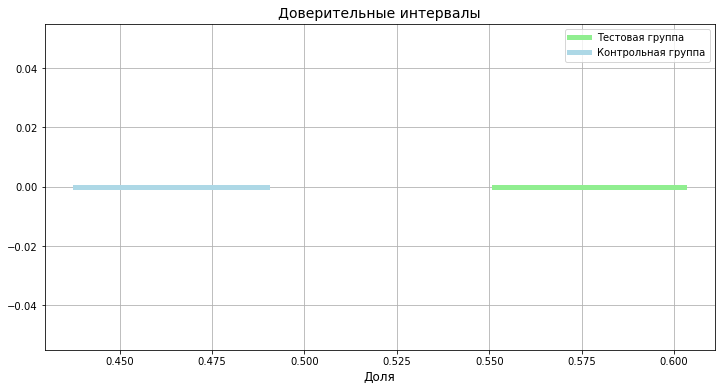

In [26]:
figure, ax = plt.subplots(figsize = (12, 6))
ax.plot(list(test_conf_inter), [0, 0], label = 'Тестовая группа', linewidth = 5, color = 'lightgreen')
ax.plot(list(contrl_conf_inter), [0, 0], label = 'Контрольная группа', linewidth = 5, color = 'lightblue')
ax.set_title('Доверительные интервалы', size = 14)
ax.set_xlabel('Доля', size = 12)
ax.legend()
plt.grid()
